# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [87]:
import math

## JARVIS MARCH

def direction(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return 2


def jarvismarch(inputSet):
    '''
    Returns the list of points that lie on the convex hull (jarvis march algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''
    if len(inputSet) < 3:
        return

    minPoint = min(inputSet, key= lambda inputSet: inputSet[0])
    index = inputSet.index(minPoint)

    hullPoints = []
    p = index
    hullPoints.append(minPoint)

    while (True):
        q = (p + 1) % len(inputSet)
        for r in range(len(inputSet)):
            if r == p:
                continue 
            if(direction(inputSet[p], inputSet[r], inputSet[q]) == 2):
                q = r

        p = q
        if p == index:
            break
        hullPoints.append(inputSet[p])

    return hullPoints

Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [88]:
## GRAHAM SCAN

def orientation_1(p1, p2, p3):
    """
    To find the orientation of an ordered triplet (p1, p2, p3).
    The function returns following values:
    0 --> p1, p2 and p3 are collinear
    1 --> Clockwise
    2 --> Counterclockwise
    """
    val = (p2[1] - p1[1]) * (p3[0] - p2[0]) - (p2[0] - p1[0]) * (p3[1] - p2[1])
    if val == 0:
        return 0  # collinear
    elif val > 0:
        return 1  # clockwise
    else:
        return 2  # counter-clockwise


def square_distance(p1, p2):
    """
    Calculate the square of the distance between two points
    """
    return (p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2


def bottom_left(points):
    """
    Find the bottom-left point from a list of points.
    """
    return min(points, key=lambda p: (p[1], p[0]))


def quick_sort(points, start, square_distance):
    # Quick sort implementation in python copied in instead of the sorted() library which is written in C
    # Using C code would affect the speed of the code artificially disregarding the impact of the algorithms.

    stack = [(0, len(points) - 1)]
    
    while stack:
        low, high = stack.pop()
        if low < high:
            pivot_index = partition(points, low, high, start, square_distance)
            stack.extend(((low, pivot_index - 1), (pivot_index + 1, high)))
    return points

def partition(points, low, high, start, square_distance):
    pivot = points[high]
    i = low - 1
    for j in range(low, high):
        if (math.atan2(points[j][1] - start[1], points[j][0] - start[0]), square_distance(start, points[j])) <= (math.atan2(pivot[1] - start[1], pivot[0] - start[0]), square_distance(start, pivot)):
            i += 1
            points[i], points[j] = points[j], points[i]
    points[i + 1], points[high] = points[high], points[i + 1]
    return i + 1

def graham_scan_2(points):
    
    if len(points) <= 3:
        return points
    """
    Graham scan algorithm to find the convex hull of a set of points, using tuples.
    """
    # Step 1: Find the bottom-left point and sort the points based on polar angle with respect to it
    start = bottom_left(points)
    sorted_points = quick_sort(points, start, square_distance)
    
    # sorted_points = sorted(points,
    #                        key=lambda p: (math.atan2(p[1] - start[1], p[0] - start[0]), square_distance(start, p)))

    # Step 2: Scan the sorted list of points
    hull = [sorted_points[0], sorted_points[1]]  # Initialize the hull with the first two points

    for point in sorted_points[2:]:
        while len(hull) > 1 and orientation_1(hull[-2], hull[-1], point) != 2:
            hull.pop()  # Remove the last point from the hull if we turn clockwise
        hull.append(point)

    return hull

In [89]:

def graham_scan(points):
    """
    Graham scan algorithm to find the convex hull of a set of points, using tuples.
    """
    def orientation(p1, p2, p3):
        """
        To find the orientation of an ordered triplet (p1, p2, p3).
        The function returns following values:
        0 --> p1, p2 and p3 are collinear
        1 --> Clockwise
        2 --> Counterclockwise
        """
        val = (p2[1] - p1[1]) * (p3[0] - p2[0]) - (p2[0] - p1[0]) * (p3[1] - p2[1])
        if val == 0:
            return 0  # collinear
        elif val > 0:
            return 1  # clockwise
        else:
            return 2  # counter-clockwise
    def square_distance(p1, p2):
        """
        Calculate the square of the distance between two points
        """
        return (p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2


    def bottom_left(points):
        """
        Find the bottom-left point from a list of points.
        """
        return min(points, key=lambda p: (p[1], p[0]))
        
    
    if len(points) == 1:
        return points
    
    # Step 1: Find the bottom-left point and sort the points based on polar angle with respect to it
    start = bottom_left(points)
    sorted_points = sorted(points,
                           key=lambda p: (math.atan2(p[1] - start[1], p[0] - start[0]), square_distance(start, p)))

    # Step 2: Scan the sorted list of points
    hull = [sorted_points[0], sorted_points[1]]  # Initialize the hull with the first two points

    for point in sorted_points[2:]:
        while len(hull) > 1 and orientation(hull[-2], hull[-1], point) != 2:
            hull.pop()  # Remove the last point from the hull if we turn clockwise
        hull.append(point)
    
    # # Extract the origin support point from the result list
    
    return hull

Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [90]:
"""
Jarvis March For Testing Purpose Only !!!
!!! To be deleted later !!!
"""

TURN_LEFT, TURN_RIGHT, TURN_NONE = (1, -1, 0)
def cmp(a, b):
    return (a > b) - (a < b) 

def turn(p, q, r):
    """Returns -1, 0, 1 if p,q,r forms a right, straight, or left turn."""
    return cmp((q[0] - p[0])*(r[1] - p[1]) - (r[0] - p[0])*(q[1] - p[1]), 0)

def _dist(p, q):
    """Returns the squared Euclidean distance between p and q."""
    dx, dy = q[0] - p[0], q[1] - p[1]
    return dx * dx + dy * dy

def _next_hull_pt(points, p):
    """Returns the next point on the convex hull in CCW from p."""
    q = p
    for r in points:
        t = turn(p, q, r)
        if t == TURN_RIGHT or t == TURN_NONE and _dist(p, r) > _dist(p, q):
            q = r
    return q

def jarvis(points, limit):
    """Returns the points on the convex hull of points in CCW order."""
    times = 0
    hull = [min(points)]
    for p in hull:
        q = _next_hull_pt(points, p)
        times += 1
        if times == limit:
            return True, hull
        
        if q != hull[0]:
            hull.append(q)

    return False, hull

In [91]:
'''
TESTING PURPOSE ONLY !!!!!!!!
'''
import random as rd
def generte_random_points():
    points = []
    number_of_points = rd.randint(1000,1000)
    for i in range(number_of_points):
        x = rd.randint(-100,100)
        y = rd.randint(-100,100)
        points.append((x,y))
    return points


In [92]:

import matplotlib.pyplot as plt

def chen(inputSet):
    '''
    Returns the list of points that lie on the convex hull (chen's algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''
    #ADD YOUR CODE HERE
    '''
    Steps:
    1. Divide into sections, starting from 3
    2  Apply Jarvis march to each section -> filter sections
    3. Run binary search on each section to find the most right tangent
    4. Compare the tangents to find the next convex hull point
    5. Repeat the step until all the points were found
    ''' 
    def same_point(a,b):
        return a[0] == b[0] and a[1] == b[1]
    
    def distance(a,b):
        return (a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2
    
    # divide the set into sections based on h
    def divide_sections(points, points_in_sec):
        return [points[i:i + points_in_sec] for i in range(0, len(points), points_in_sec)]
    
    # Calculate the angle from current point to last point and checkpoint
    def angle(last_point, current_point, check_point):
        dot_product = (last_point[0] - current_point[0]) * (check_point[0] - current_point[0]) \
            + (last_point[1] - current_point[1]) * (check_point[1] - current_point[1])
        
        length_product = math.sqrt((last_point[0] - current_point[0])**2 + (last_point[1] - current_point[1]) ** 2) * \
            math.sqrt((check_point[0] - current_point[0]) ** 2 + (check_point[1] - current_point[1]) ** 2)
        
        if length_product == 0:
            return -1
        cos_theta = dot_product / length_product
        cos_theta = max(min(cos_theta, 1.0), -1.0)  # clamp to [-1, 1] to avoid domain error
        return math.acos(cos_theta)
   
    # check wether a is above b referencing c
    def above(a,b,lastpoint, currentpoint):
        return  angle(lastpoint, currentpoint, a) > angle(lastpoint, currentpoint, b) 

    def below(a,b,lastpoint, currentpoint):
        return  angle(lastpoint, currentpoint, a) < angle(lastpoint, currentpoint, b) 
    
    def binary_search(last_point, current_point, points):
        """
        Use Binary Search to find the tangent point by detecting:
            1. The angle between last point, current point and new point from input
            2. Set start, end, mid
            3. In each loop, if the vector of pointA to the next point is facing down, 
                and the vector of the point before A towards A is not facing up, then A is the tangent
            4. update start and end based on different facing direction of start and mid points.
        """    
        
        start = 0
        end = len(points) - 1
        # used for infinite loop checking
        record = (-10,-10,-10)
        
        # Only one point from the input, return the point
        if start == end:
            return points[0]
        
        while True:
            mid = (start + end) // 2
            mid_down = below(points[mid + 1], points[mid], last_point, current_point)
            # raise exception if stuck in the loop
            if record == (start, mid, end):
                raise Exception("Error")
            record = (start, mid, end)
            
            if angle(last_point, current_point, points[start+1]) == angle(last_point, current_point, points[start]):
                return points[start+1]
            
            # check if mid is the target tangent point
            if mid_down and (not above (points[mid - 1], points[mid], last_point, current_point)):
                return points[mid]

            # check if start is the target tangent point
            elif below(points[start+1], points[start], last_point, current_point) \
                and (not above (points[start-1], points[start], last_point, current_point)):
                return points[start]
            
            # check if end is the target tangent point
            elif below(points[end+1 - len(points)], points[end], last_point, current_point)\
                and (not above (points[end - 1], points[end], last_point, current_point)):
                return points[end]
            
            else:
                start_up = above(points[start + 1], points[start], last_point, current_point)
                # start point facing up
                if start_up:
                    # mid point facing down
                    if mid_down:
                        end = mid
                    else:
                        # start point is above mid
                        if above(points[start], points[mid], last_point, current_point):
                            end = mid
                        # start point below mid
                        else:
                            start = mid
                # start point facing down
                else:
                    # mid point not facing down
                    if not mid_down:
                        start = mid
                    else:
                        # start point above mid
                        if below(points[start], points[mid],last_point,current_point):
                            end = mid
                        # start point below mid
                        else:
                            start = mid
                        
    # Find the next
    def find_next_global_convex_hull(recorded_ch, divided_sections):
        current_point = recorded_ch[-1]
        last_point = recorded_ch[-2]
        most_right_angle = 0
        most_right_point = last_point
        
        for section in divided_sections:
            section_tangent_point = binary_search(last_point, current_point, section)
            section_tangent_angle = angle(last_point, current_point, section_tangent_point)
            if section_tangent_angle > most_right_angle:
                most_right_angle = section_tangent_angle
                most_right_point = section_tangent_point
            
            elif section_tangent_angle == most_right_angle:
                # Make sure the search returns only the endpoints not the point sit on the line
                if distance(current_point, section_tangent_point) > distance(current_point, most_right_point):
                    most_right_angle = section_tangent_angle
                    most_right_point = section_tangent_point 

        return most_right_point
    
    n = len(inputSet)
    init_h = 3
    left_most_point = min(inputSet, key=lambda point: point[0])
    # This will be the point one unit above the startpoint, to support it finds the next convex hull
    # It will be recorded in the convexhull list with idx 0
    origin_point = (left_most_point[0],left_most_point[1] + 1)
    
    # check the time of loops is within the limit 
    in_h_times = False
    times = 2
    while not in_h_times:
        divided_section = divide_sections(inputSet, init_h)

        # Find Local Convex Hull
        # divided_section = list(map(lambda section: convex_hull(section), divided_section)) 
        divided_section = list(map(graham_scan, divided_section))
    
        global_convex = [origin_point, left_most_point]

        # find global convex hulls
        for i in range(init_h+1):
            global_convex.append(find_next_global_convex_hull(global_convex, divided_section))
            if (same_point(global_convex[-1], global_convex[1]) and not len(global_convex) == 2):
                in_h_times = True 
                break
        # update limit h (and section number)         
        
        times += 1
        init_h = min(2 ** (2 ** times), n) 
    
    # Extract the origin support point from the result list
    return global_convex[1:]

In [93]:
def linear(points):
    """
    Linear implementation of Jarvis March
    1. Divide each section and run graham scan to filter points
    2. Run Jarvis March on the filtered points
    """
    def divide_points(points, h):
        return [points[i:i + h] for i in range(0, len(points), h)]

    incomplete_convex = True
    times = 2
    while incomplete_convex :
        h = 2 ** (2 ** times)
        divided_section = divide_points(points, h)
        filtered_points = []
        for section in divided_section:
            filtered_points.extend(graham_scan(section))
        incomplete_convex, result = jarvis(filtered_points, h)
        times += 1
        

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [94]:
import random

class TestDataGenerator():
    """
    A class to represent a synthetic data generator.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE
    
    def __init__(self, input):
        pass


Use the cell below to implement the requested **experimental framework** API.

In [95]:
import timeit
import matplotlib

class TestDataGenerator():
    """
    A class to represent a synthetic data generator.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
    def __init__(self, n, h):
        self.n = n
        self.h = h
        self.scale = 32767
        self.convexHull = self.generateConvexPolygon()
        self.points = self.generatePointsInside()


    def generatePointsInside(self):
        count = self.h
        points = self.convexHull.copy()

        while count < self.n:
            xPoint = random.randint(0, self.scale)
            yPoint = random.randint(0, self.scale)

            if self.isInsidePoly(xPoint, yPoint):
                points.append((xPoint, yPoint))
                count += 1

        return points

    def isInsidePoly(self, xPoint, yPoint):
        inside = False
        p1x, p1y = self.convexHull[0]
        for i in range(self.h + 1):
            p2x, p2y = self.convexHull[i % self.h]
            if yPoint > min(p1y, p2y) and yPoint <= max(p1y, p2y):
                if xPoint <= max(p1x, p2x):
                    if p1y != p2y:
                        xintersection = (yPoint - p1y) * (p2x - p1x) / (p2y - p1y) + p1x #Ray tracing formula
                    if p1x == p2x or xPoint <= xintersection:
                        inside = not inside
        
            p1x, p1y = p2x, p2y

        return inside 


    def generateConvexPolygon(self):
        # Credit to Pavel Valtr for convex polygon algorithm design

        ''' 
        Starting from a convex polygon allows specfying h value.
        Valtr's algorithm allows random polygons in a square domain unlike circumcircle method. 
        '''

        xs = []
        ys = []
        for _ in range(self.h):
            xs.append(random.randint(0, self.scale))
            ys.append(random.randint(0, self.scale))
            
        xs.sort()
        ys.sort()
        min_x, *xs, max_x = xs
        min_y, *ys, max_y = ys
        
        xVector = self.makeVectors(xs, min_x, max_x)
        yVector = self.makeVectors(ys, min_y, max_y)
        random.shuffle(yVector)

        vectors = sorted(zip(xVector, yVector), key=self.vectorAngle)
        xPoint = yPoint = 0
        poly_x_min = poly_y_min = 0 
        points = []
        
        for xVector, yVector in vectors:
            points.append((xPoint, yPoint))

            xPoint += xVector
            yPoint += yVector
            
            poly_x_min = min(poly_x_min, xPoint)
            poly_y_min = min(poly_y_min, yPoint)

        xShift, yShift = min_x - poly_x_min, min_y - poly_y_min
        points = [(xPoint + xShift, yPoint + yShift) for xPoint, yPoint in points]

        return points
            

    
    def makeVectors(self, coordinates, min_coord, max_coord):
        '''
        Creates a random set of vectors that cancel each other out within range: min_coord, max_coord
        '''
        vectors = []
        last_down = last_up = min_coord

        for coord in coordinates:
            if random.getrandbits(1): #randomiser function
                vectors.append(coord - last_down)
                last_down = coord
            else:
                vectors.append(last_up - coord)
                last_up = coord
        vectors.extend((max_coord - last_down, last_up - max_coord))

        return vectors

    def vectorAngle(self, vector):
        x, y = vector
        return math.atan2(y, x)
        

In [96]:
points = TestDataGenerator(100,16).convexHull
len(points)

16

In [97]:
import timeit as ti
# Generate Points
# points = [(0.1, 0.8), (0.5, 0.2), (0.3, 0.6), (0.9, 0.4), (0.7, 0.3), (0.2, 0.5), (0.6, 0.9), (0.4, 0.1), (0.8, 0.7), (0.2, 0.3), (0.6, 0.1), (0.8, 0.5), (0.4, 0.8), (0.1, 0.7), (0.7, 0.6), (0.9, 0.3), (0.5, 0.9), (0.3, 0.4), (0.5, 0.6), (0.8, 0.2), (0.4, 0.5), (0.2, 0.9), (0.6, 0.3), (0.1, 0.4), (0.9, 0.7), (0.7, 0.8), (0.3, 0.1), (0.8, 0.4), (0.4, 0.6)]

In [99]:
# Test the efficiency with increasing n
gra1 = []
bi1 = []
line1 = [] 
jar1 = []
X = []
for n in range(3,2000,150):
    X.append(n)
    i = n
    points = TestDataGenerator(n, i).points
    j_t, g_t, b_t, l_t = 0, 0, 0, 0
    for i in range(3):
        start = ti.default_timer()
        jarvis(points, n+1)
        j_t += ti.default_timer() - start 
        
        start = ti.default_timer()
        graham_scan(points)
        g_t += ti.default_timer() - start
        
        start = ti.default_timer()
        chen(points)
        b_t += ti.default_timer() - start
        
        start = ti.default_timer()
        linear(points)
        l_t += ti.default_timer() - start
    
    jar1.append(j_t / 10)                                                              
    gra1.append(g_t / 10)
    bi1.append(b_t / 10)
    line1.append(l_t/ 10)

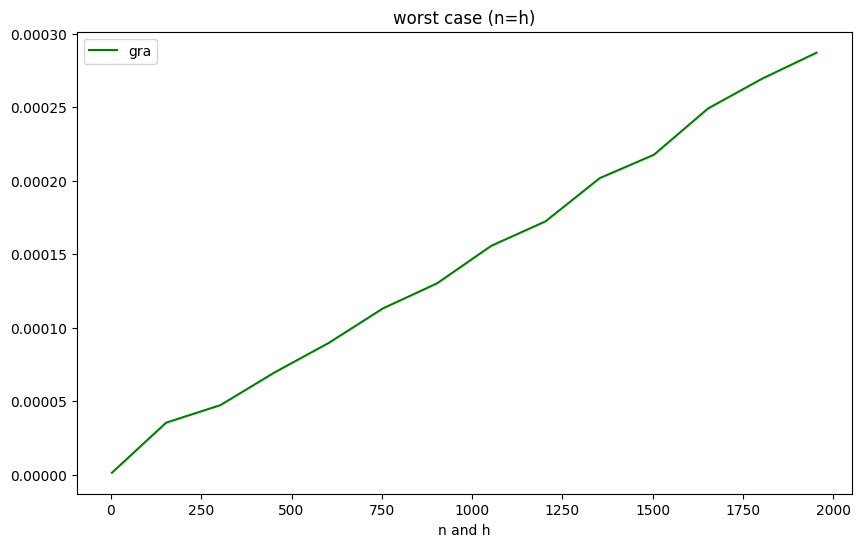

In [107]:
                       
plt.figure(figsize=(10,6))
# plt.plot(X,jar1, label = 'jar', marker = '',color = 'r')
plt.plot(X,gra1, label = 'gra', marker = '', color = 'g')
# plt.plot(X,bi1, label = 'bi', marker = '', color = 'b')
# plt.plot(X,line1, label = 'linear', marker = '', color = 'orange')
plt.xlabel('n and h')
plt.title("worst case (n=h)")
plt.legend()

In [ ]:
# Test the efficiency with increasing n
gra2 = []
bi2 = []
line2 = [] 
jar2 = []

for n in range(1000,20000,100):
    i = 4
    points = TestDataGenerator(n, i).points
    j_t, g_t, b_t, l_t = 0, 0, 0, 0
    for i in range(10):
        start = ti.default_timer()
        jarvis(points, n+1)
        j_t += ti.default_timer() - start 
        
        start = ti.default_timer()
        graham_scan(points)
        g_t += ti.default_timer() - start
        
        start = ti.default_timer()
        chen(points)
        b_t += ti.default_timer() - start
        
        start = ti.default_timer()
        linear(points)
        l_t += ti.default_timer() - start
    
    jar2.append(j_t / 10)                                                              
    gra2.append(g_t / 10)
    bi2.append(b_t / 10)
    line2.append(l_t/ 10)
    


In [101]:
plt.figure(figsize=(25,10))
plt.plot(jar2, label = 'jar', marker = '')
plt.plot(gra2, label = 'gra', marker = '')
plt.plot(bi2, label = 'bi', marker = '')
plt.plot(line2, label = 'chen', marker = '')
plt.title("i at 4 with increasing n (1000 - 20000)")
plt.legend()

NameError: name 'jar2' is not defined

<Figure size 2500x1000 with 0 Axes>

In [ ]:
# Test the efficiency with increasing n
gra3 = []
bi3 = []
line3 = [] 
jar3 = []

for n in range(100,20000,1000):
    i = 100
    points = TestDataGenerator(n, i).points
    j_t, g_t, b_t, l_t = 0, 0, 0, 0
    for i in range(10):
        start = ti.default_timer()
        jarvis(points, n+1)
        j_t += ti.default_timer() - start 
        
        start = ti.default_timer()
        graham_scan(points)
        g_t += ti.default_timer() - start
        
        start = ti.default_timer()
        chen(points)
        b_t += ti.default_timer() - start
        
        start = ti.default_timer()
        linear(points)
        l_t += ti.default_timer() - start
    
    jar3.append(j_t / 10)                                                              
    gra3.append(g_t / 10)
    bi3.append(b_t / 10)
    line3.append(l_t/ 10)
    


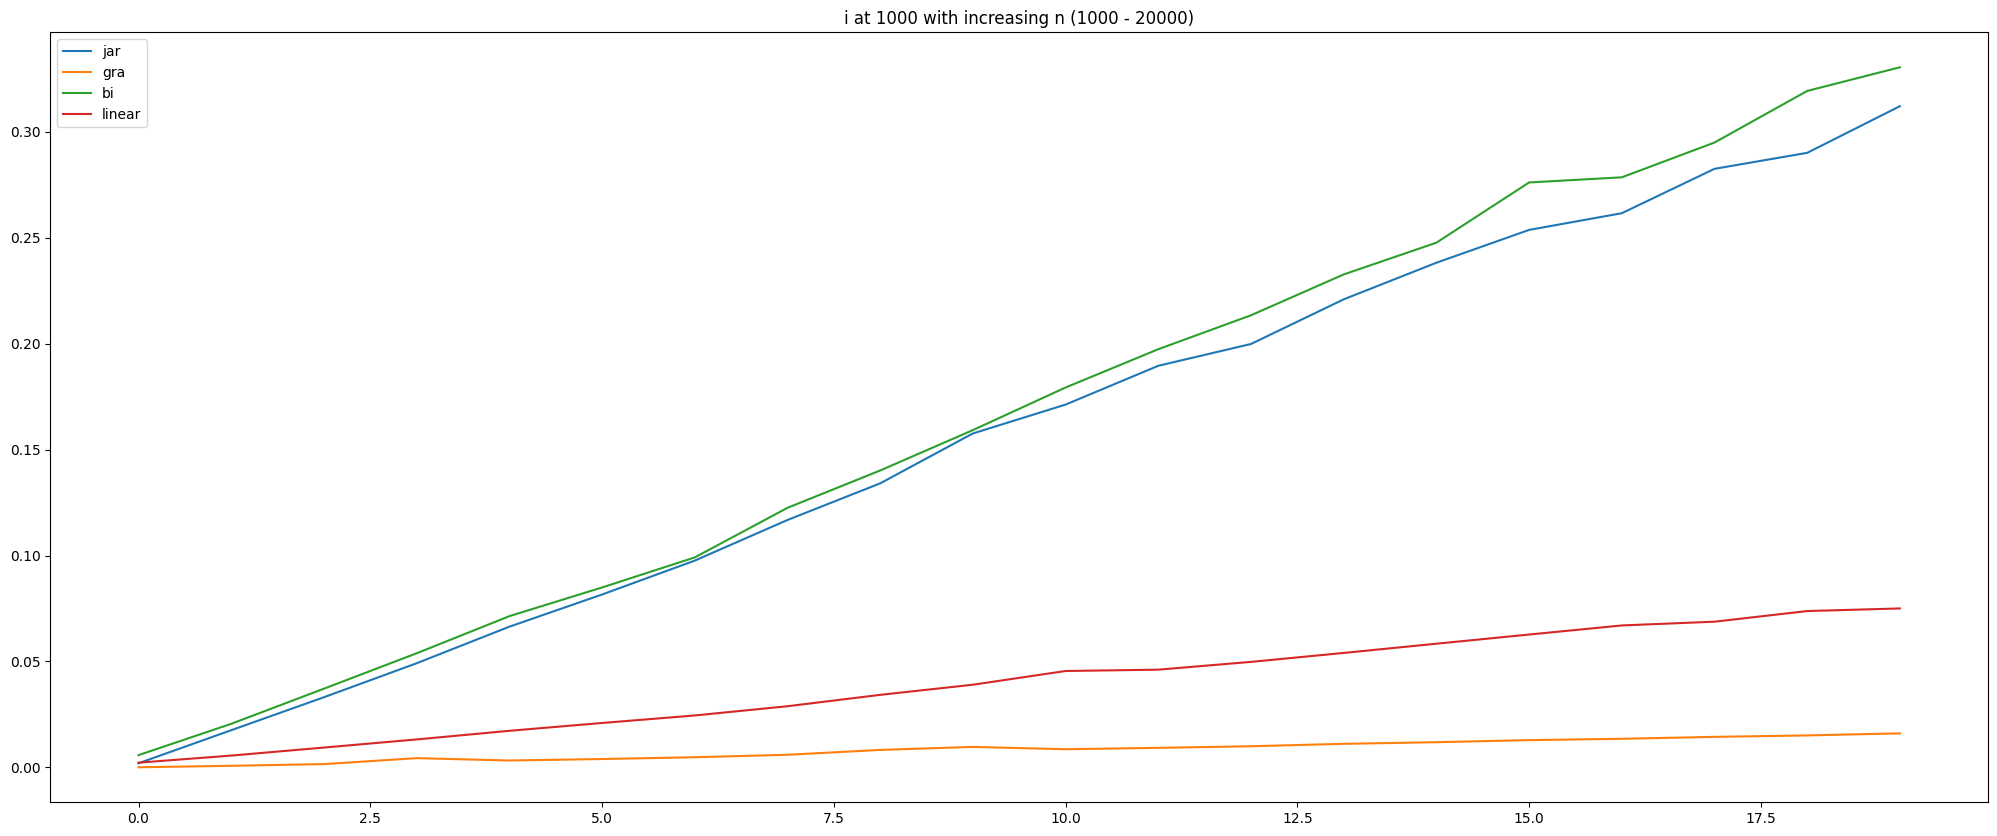

In [ ]:


plt.figure(figsize=(25,10))
plt.plot(jar3, label = 'jar', marker = '')
plt.plot(gra3, label = 'gra', marker = '')
plt.plot(bi3, label = 'bi', marker = '')
plt.plot(line3, label = 'linear', marker = '')
plt.title("i at 1000 with increasing n (1000 - 20000)")
plt.legend()

In [ ]:
m_jar3 = []
m_jar1 = []
X = []
print(len(jar1))
for x in range(19):
    m_jar1.append(jar1[x * 10])
    m_jar3.append(jar3[x * 10])
    X.append(x * 1000 + 1000)

190


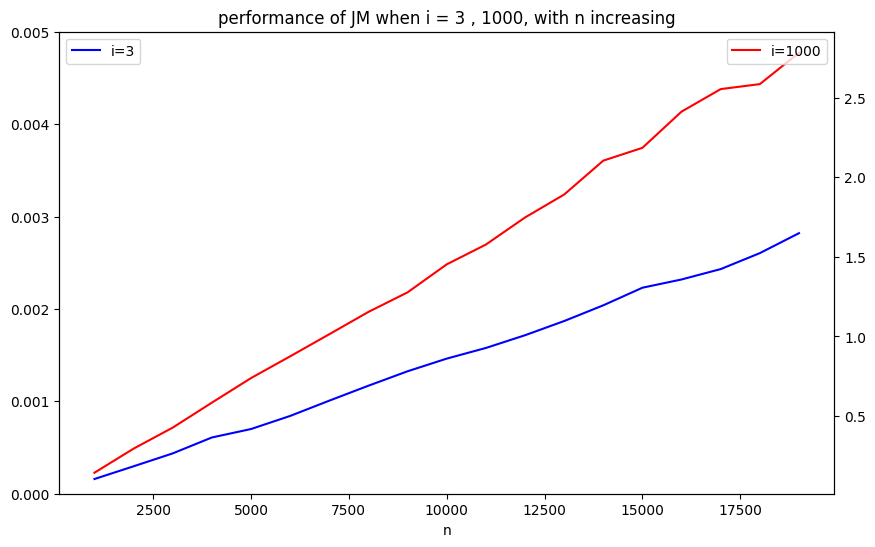

In [ ]:
fig, ax1 = plt.subplots(figsize = (10,6))

ax1.plot(X,m_jar1, label = 'i=3', color = 'blue')
ax1.tick_params(axis='y')
ax1.set_ylim(0,0.005)
ax1.set_xlabel('n')

ax2 = ax1.twinx()
ax2.plot(X,m_jar3, label = 'i=1000',color = 'red')
ax2.tick_params(axis='y')
# Display legend for both curves
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title("performance of JM when i = 3 , 1000, with n increasing")
plt.show()



In [ ]:
# Test the efficiency with increasing n
gra4 = []
bi4 = []
line4 = [] 
jar4 = []

for i in range(100,2000,100):
    n = 2000
    points = TestDataGenerator(n, i).points
    j_t, g_t, b_t, l_t = 0, 0, 0, 0
    for i in range(10):
        # start = ti.default_timer()
        # jarvismarch(points, n+1)
        # j_t += ti.default_timer() - start 
        
        # start = ti.default_timer()
        # graham_scan(points)
        # g_t += ti.default_timer() - start
        
        start = ti.default_timer()
        chen(points)
        b_t += ti.default_timer() - start
        
        start = ti.default_timer()
        linear(points)
        l_t += ti.default_timer() - start
    
    # jar4.append(j_t / 10)                                                              
    # gra4.append(g_t / 10)
    bi4.append(b_t / 10)
    line4.append(l_t/ 10)
    


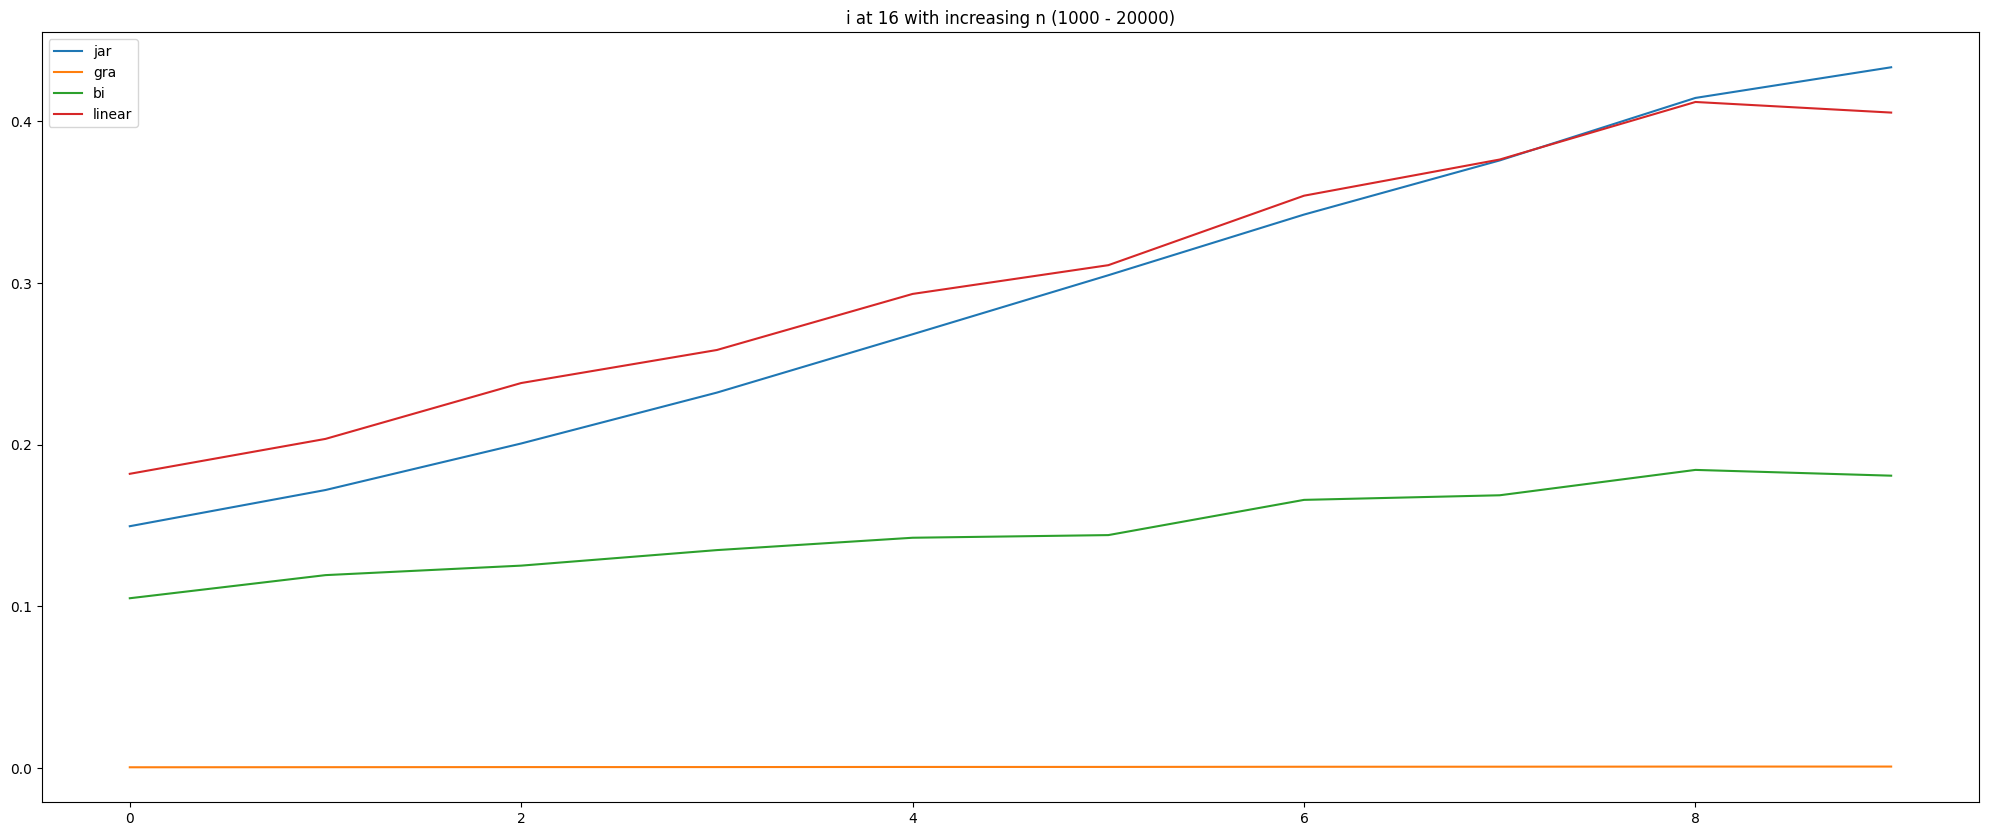

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(jar4, label = 'jar', marker = '')
plt.plot(gra4, label = 'gra', marker = '')
plt.plot(bi4, label = 'bi', marker = '')
plt.plot(line4, label = 'linear', marker = '')
plt.title("i at 16 with increasing n (1000 - 20000)")
plt.legend()

In [ ]:
# Constant n with increasing i
# Test the efficiency with increasing n
gra5 = []
bi5 = []
line5 = [] 
jar5 = []
X_5 = []

for i in range(10,10000,1000):
    X.append(i)
    n = 10000
    points = TestDataGenerator(n, i).points
    j_t, g_t, b_t, l_t = 0, 0, 0, 0
    for i in range(10):
        # start = ti.default_timer()
        # jarvis(points, n+1)
        # j_t += ti.default_timer() - start 
        
        # start = ti.default_timer()
        # graham_scan(points)
        # g_t += ti.default_timer() - start
        
        start = ti.default_timer()
        chen(points)
        b_t += ti.default_timer() - start
        
        start = ti.default_timer()
        linear(points)
        l_t += ti.default_timer() - start
    
    # jar5.append(j_t / 10)                                                              
    # gra5.append(g_t / 10)
    bi5.append(b_t / 10)
    line5.append(l_t/ 10)
    


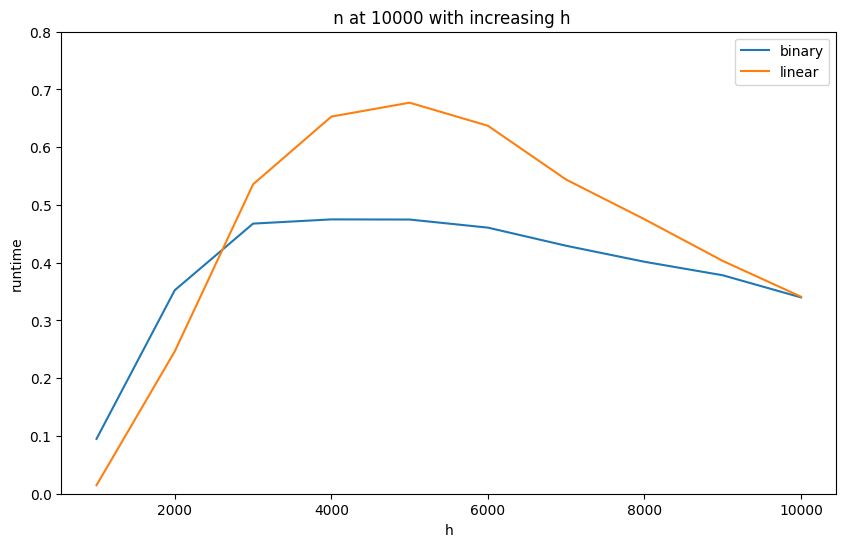

In [ ]:
X = [x * 1000 for x in range(1,11)]
plt.figure(figsize=(10,6))
plt.ylim(0,0.8)
# plt.plot(jar5, label = 'jar', marker = '')
# plt.plot(gra5, label = 'gra', marker = '')
plt.plot(X,bi5, label = 'binary', marker = '')
plt.plot(X,line5, label = 'linear', marker = '')
plt.title(" n at 10000 with increasing h")
plt.xlabel('h')
plt.legend()

In [ ]:
# Constant n with increasing i
# Test the efficiency with increasing n
gra6 = []
bi6 = []
line6 = [] 
jar6 = []

for i in range(100,2000,100):
    n = 2000
    points = TestDataGenerator(n, i).points
    j_t, g_t, b_t, l_t = 0, 0, 0, 0
    for i in range(10):
        start = ti.default_timer()
        jarvismarch(points)
        j_t += ti.default_timer() - start 
        
        start = ti.default_timer()
        graham_scan(points)
        g_t += ti.default_timer() - start
        
        start = ti.default_timer()
        chen(points)
        b_t += ti.default_timer() - start
        
        start = ti.default_timer()
        linear(points)
        l_t += ti.default_timer() - start
    
    jar6.append(j_t / 10)                                                              
    gra6.append(g_t / 10)
    bi6.append(b_t / 10)
    line6.append(l_t/ 10) 


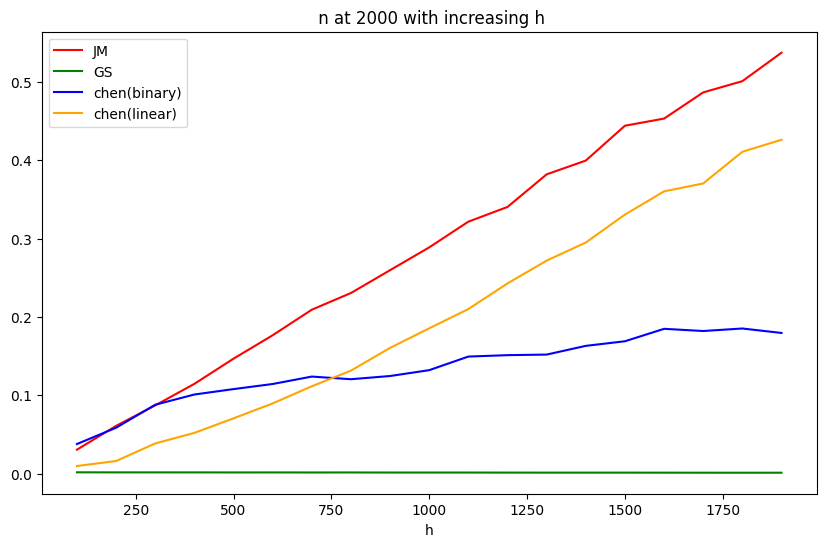

In [ ]:
X = [x * 100 for x in range(1,20)]
plt.figure(figsize=(10,6))
plt.plot(X,jar6, label = 'JM', marker = '',color = 'r')
plt.plot(X, gra6, label = 'GS', marker = '', color = 'g')
plt.plot(X, bi6, label = 'chen(binary)', marker = '', color = 'b')
plt.plot(X, line6, label = 'chen(linear)', marker = '', color = 'orange')
plt.xlabel("h")
plt.title(" n at 2000 with increasing h")
plt.legend()

In [ ]:
# Constant n with increasing i
# Test the efficiency with increasing n
gra7 = []
bi7 = []
line7 = [] 
jar7 = []

for n in range(100,5000,1000):
    i = 1000
    points = TestDataGenerator(n, i).points
    j_t, g_t, b_t, l_t = 0, 0, 0, 0
    for i in range(10):
        start = ti.default_timer()
        jarvis(points, n+1)
        j_t += ti.default_timer() - start 
        
        start = ti.default_timer()
        graham_scan(points)
        g_t += ti.default_timer() - start
        
        start = ti.default_timer()
        chen(points)
        b_t += ti.default_timer() - start
        
        start = ti.default_timer()
        linear(points)
        l_t += ti.default_timer() - start
    
    jar7.append(j_t / 10)                                                              
    gra7.append(g_t / 10)
    bi7.append(b_t / 10)
    line7.append(l_t/ 10)
    


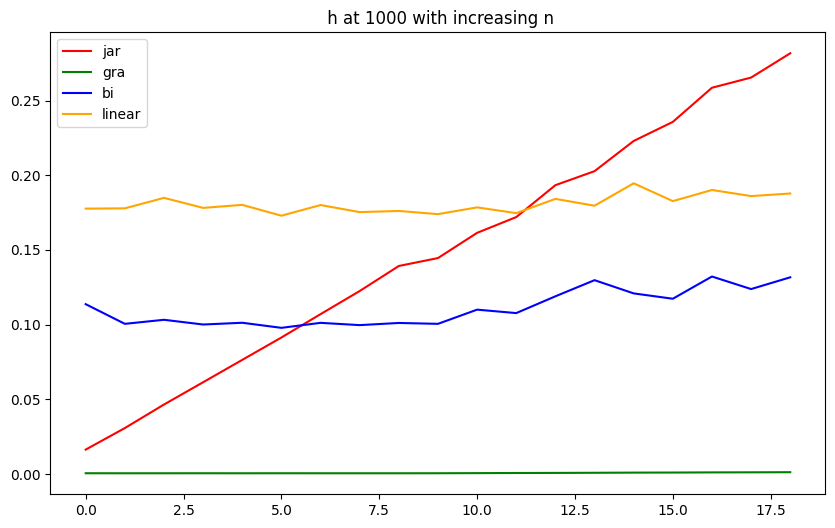

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(jar7, label = 'jar', marker = '', color = 'r')
plt.plot(gra7, label = 'gra', marker = '', color = 'g')
plt.plot(bi7, label = 'bi', marker = '', color = 'b')
plt.plot(line7, label = 'linear', marker = '', color = 'orange')
plt.title(" h at 1000 with increasing n")
plt.legend()

In [ ]:
# Constant n with increasing i
# Test the efficiency with increasing n
jar8 = []

for r in range(1,11):
    n = 2000
    i = int(r * n * 0.1)
    points = TestDataGenerator(n, i).points
    j_t, g_t, b_t, l_t = 0, 0, 0, 0
    for i in range(10):
        start = ti.default_timer()
        jarvis(points, n+1)
        j_t += ti.default_timer() - start 
    
    jar8.append(j_t / 10)                                                              

NameError: name 'random' is not defined

In [ ]:
X = [x for x in range(10)]

fig, ax1 = plt.subplots(figsize = (10,6))

ax1.plot(X,jar7, label = 'i=20000', color = 'blue')
ax1.tick_params(axis='y')
ax1.set_xlabel('i / n')

ax2 = ax1.twinx()
ax2.plot(X,jar8, label = 'i=1000',color = 'red')
ax2.tick_params(axis='y')
# Display legend for both curves
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title("performance of JM when n = 1000, 20000 , ration i/n increases")
plt.show()



NameError: name 'plt' is not defined

In [ ]:
X = []
jar_3 = []
jar_1000 = []

for n in range(1000,20000,1000):
    print(n)
    time_3 = 0
    time_5 = 0
    points_3 = TestDataGenerator(n,3).points
    points_1000 = TestDataGenerator(n,1000).points
    X.append(n)
    for i in range(5):
        start = ti.default_timer()
        jarvismarch(points_3)
        time_3 += ti.default_timer() - start
        
        start = ti.default_timer()
        jarvismarch(points_1000)
        time_5 += ti.default_timer() - start 
    jar_3.append(time_3 / 5)
    jar_1000.append(time_5 / 5)    
        

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


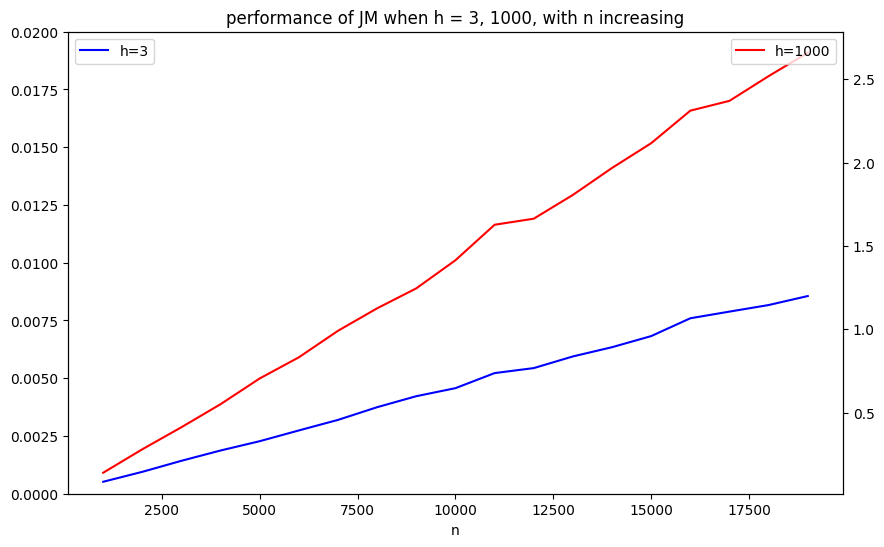

In [ ]:
fig, ax1 = plt.subplots(figsize = (10,6))

ax1.plot(X,jar_3, label = 'h=3', color = 'blue')
ax1.tick_params(axis='y')
ax1.set_xlabel('n')
ax1.set_ylim(0,0.02)

ax2 = ax1.twinx()
ax2.plot(X,jar_1000, label = 'h=1000',color = 'red')
ax2.tick_params(axis='y')
# Display legend for both curves
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title("performance of JM when h = 3, 1000, with n increasing")
plt.show()

Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

In [ ]:
# ADD YOUR TEST CODE HERE 





In [ ]:
def chen1(inputSet):
    """
    Returns the list of points that lie on the convex hull (chen's algorithm)
        Parameters:
            inputSet (list): a list of 2D points

        Returns:
            outputSet (list): a list of 2D points
    """

    # ADD YOUR CODE HERE

    t = 1  # arbitrary value to 'guess' number of vertices h in outputSet
    n = len(inputSet)
    while True:
        H = min(pow(2, pow(2, t)), n)  # guessed max number of vertices
        m = H  # size of each partition
        outputSet = chenBody(inputSet, m, H)
        t += 1
        if outputSet != None:
            print("H:", H)
            break

    return outputSet


def splitList(lst, chunkSize):
    """Splits a list into chunks of size chunkSize. The last chunk may be smaller than chunkSize.

    Args:
        lst (list): list to be split
        chunkSize (int): size of each chunk

    Returns:
        (list of lists): a list of lists each of size chunkSize
    """
    return [lst[i : i + chunkSize] for i in range(0, len(lst), chunkSize)]


def getLowestPoint(partitions):
    """Finds the lowest point among all partitions. If there are multiple lowest points, the one with the lowest x-coordinate is returned.

    Args:
        partitions (list of lists of 2-tuples): the list containing all partitions (lists of points)

    Returns:
        (2-tuple): the lowest point that is also the leftmost among all lowest points
    """
    lowestPoints = []
    for i in range(len(partitions)):
        # find the lowest point in each partition
        lowestPoints.append(min(partitions[i], key=lambda y: y[1]))

    return min(lowestPoints, key=lambda point: (point[1], point[0]))


def getSmallHulls(inputSet, m):
    """Split the inputSet into partitions of size m and find the convex hull of each partition.

    Args:
        inputSet (list): the list of all points
        m (int): the size of each partition

    Returns:
        (list of lists of 2-tuples): convex hull vertices of each partition in counter-clockwise order
    """
    partitions = splitList(inputSet, m)

    for i in range(len(partitions)):
        partitions[i] = graham_scan(partitions[i])

    return partitions


def leftOfVector(a, b, pointToTest):
    """Detemines if a point is to the left of a vector.

    Args:
        a (2-tuple): (x,y) coordinates of starting point of vector
        b (2-tuple): end point of vector
        pointToTest (2-tuple): point to be tested

    Returns:
        int: > 0 if pointToTest is to the left of vector ab, == 0 if it is on the vector ab, and < 0 if it is to the right of vector ab
    """
    return (b[0] - a[0]) * (pointToTest[1] - a[1]) - (b[1] - a[1]) * (
        pointToTest[0] - a[0]
    )  # cross product


def findRightTangent(hull, point):
    """Finds the right tangent of a point to a convex hull.
        Right tangent: all points of the hull are to the left of the vector point-tangent.

    Args:
        hull (list of 2-tuples): 2D coordinates of vertices on the convex hull
        point (2-tuple): 2D coordinates of the point outside or on the hull to find the right tangent for

    Returns:
        (2-tuple): 2D coordinates of the right tangent point
    """
    # edge cases. mess up binary search if not handled explicitly
    if len(hull) == 1:
        return hull[0]
    if len(hull) == 2:
        if hull[0] == point:
            return hull[1]
        if hull[1] == point:
            return hull[0]

    left = 0
    last = len(hull) - 1
    right = last

    # edge case: if the point is on the line between the first and last vertices of the hull
    if leftOfVector(hull[left], hull[right], point) == 0:
        if leftOfVector(hull[left], hull[left + 1], point) > 0:
            return hull[left]

    # binary search body
    while left <= right:
        mid = (left + right) // 2

        # check if mid is the right tangent
        if leftOfVector(point, hull[mid], hull[mid - 1]) >= 0:
            if mid == last:  # wrap around
                if leftOfVector(point, hull[mid], hull[0]) > 0:
                    return hull[mid]
                elif leftOfVector(point, hull[mid], hull[0]) == 0:
                    return hull[0]
            elif leftOfVector(point, hull[mid], hull[mid + 1]) > 0:
                return hull[mid]
            elif leftOfVector(point, hull[mid], hull[mid + 1]) == 0:
                return hull[mid + 1]

        # cover all areas separated by lines L-R, M-(M+1) and L-M
        if leftOfVector(hull[left], hull[right], point) > 0:
            if leftOfVector(hull[mid], hull[mid + 1], point) > 0:
                right = mid
            else:
                if leftOfVector(hull[left], hull[mid], point) > 0:
                    right = mid
                else:
                    left = mid + 1
        else:
            if leftOfVector(hull[mid], hull[mid + 1], point) > 0:
                if leftOfVector(hull[left], hull[mid], point) > 0:
                    left = mid + 1
                else:
                    right = mid
            else:
                left = mid + 1


def getVector(a, b):
    """Returns the vector from point a to point b.

    Args:
        a (2-tuple): 2D coordinates of start point of vector
        b (2-tuple): 2D coordinates of end point of vector

    Returns:
        (2-tuple): vector as a 2D tuple
    """
    return (b[0] - a[0], b[1] - a[1])


def calcMagnitude(vector):
    """Returns magnitude of a vector.

    Args:
        vector (2-tuple): vector as a 2D tuple

    Returns:
        (double): magnitude of the vector
    """
    return math.sqrt(vector[0] ** 2 + vector[1] ** 2)


def angleBetweenVectors(a, b, c):
    """Returns the angle between vectors ab and bc in radians.

    Args:
        a (2-tuple): 2D coordinates of a
        b (2-tuple): 2D coordinates of b
        c (2-tuple): 2D coordinates of c

    Returns:
        (double): the angle rounded to 12 decimal places
    """
    ab = getVector(a, b)
    bc = getVector(b, c)

    dotProduct = ab[0] * bc[0] + ab[1] * bc[1]

    magnitude_ab = calcMagnitude(ab)
    magnitude_bc = calcMagnitude(bc)

    # eliminate rounding errors and division by zero
    if magnitude_ab < 1e-12 or magnitude_bc < 1e-12:
        return 0.0

    cosAngle = dotProduct / (magnitude_ab * magnitude_bc)

    # eliminate rounding errors
    cosAngle = max(min(cosAngle, 1), -1)

    angle = math.acos(cosAngle)

    # round() to eliminate rounding errors
    return round(angle, 12)


def negativeDistanceSq(a, b):
    """Returns the negative value of the square of the distance between points a and b.

    Args:
        a (2-tuple): 2D coordinates of a
        b (2-tuple): 2D coordinates of b

    Returns:
        (int): negative value of the square of the distance between a and b
    """
    return -((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)


def findNextVertex(prev, current, tangents):
    """Finds the next vertex by selecting the tangent with the smallest angle.
        If multiple tangents have the same angle, select the one that's furthest away.

    Args:
        prev (2-tuple): 2D coordinates of the previous vertex
        current (2-tuple): 2D coordinates of the current vertex
        tangents (list of 2-tuples): list of 2D coordinates of the tangent points

    Returns:
        (2-tuple): 2D coordinates of the next vertex
    """
    return min(
        tangents,
        key=lambda tangent: (
            # find points with smallest angle first
            angleBetweenVectors(prev, current, tangent),
            # min negativeDistanceSq means furthest away
            negativeDistanceSq(current, tangent),
        ),
    )


def getRightTangents(partitions, point):
    """Returns the right tangents of a point to all partitions.

    Args:
        partitions (list of lists of 2-tuples): contains 2D coordinates of vertices of all partitions
        point (2-tuple): 2D coordinates of the point to collect right tangents for

    Returns:
        (list of 2-tuples): 2D coordinates of the right tangent vertices
    """
    tangents = []

    for i in range(len(partitions)):
        # skip if the partition has only 1 point and it is the current point
        if not len(partitions[i]) == 1 or not partitions[i][0] == point:
            tangents.append(findRightTangent(partitions[i], point))

    return tangents


def getSecondVertex(partitions, firstVertex):
    """Gets the second vertex of the outputSet.

    Args:
        partitions (list of lists of 2-tuples): contains coordinates of vertices of all partitions
        firstVertex (2-tuple): 2D coordinates of first vertex

    Returns:
        (2-tuple): 2D coordinates of second vertex
    """
    tangents = getRightTangents(partitions, firstVertex)

    # construct an arbitrary point directly left of the first vertex
    arbitraryPoint = (firstVertex[0] - 10, firstVertex[1])

    return findNextVertex(arbitraryPoint, firstVertex, tangents)


def chenBody(inputSet, m, H):
    """Main body of one iteration of chen's algorithm.

    Args:
        inputSet (list of 2-tuples): list of coordinates of all points
        m (int): max size of each partition
        H (int): maximum number of vertices

    Returns:
        (list of 2-tuples): list of coordinates of vertices of the convex hull in counter-clockwise order
        (None): if the outputSet is not found under the given H
    """
    # no point wrapping if partition size is already greater than n
    if m >= len(inputSet):
        # current grahamscan removes its start point from the parameter list, so inputSet[:] is used to avoid potential side effects
        return graham_scan(inputSet[:])

    partitions = getSmallHulls(inputSet, m)

    outputSet = [getLowestPoint(partitions)]

    outputSet.append(getSecondVertex(partitions, outputSet[0]))

    for k in range(1, H):
        tangents = getRightTangents(partitions, outputSet[k])
        nextVertex = findNextVertex(outputSet[k - 1], outputSet[k], tangents)

        if nextVertex == outputSet[0]:
            return outputSet
        else:
            outputSet.append(nextVertex)

    return None


In [86]:
# Test the efficiency with increasing n
gra0 = []
chen0 = []
jar0 = []
bi0 = []

for i in range(100,2000,100):
    n = i
    points = TestDataGenerator(n, i).points
    j_t, g_t, b_t, l_t = 0, 0, 0, 0
    for i in range(3):
        start = ti.default_timer()
        jarvis(points, n+1)
        j_t += ti.default_timer() - start 
        
        start = ti.default_timer()
        graham_scan(points)
        g_t += ti.default_timer() - start
        
        start = ti.default_timer()
        chen(points)
        b_t += ti.default_timer() - start
        
        start = ti.default_timer()
        chen1(points)
        l_t += ti.default_timer() - start
    
    jar0.append(j_t / 10)                                                              
    gra0.append(g_t / 10)
    bi0.append(b_t / 10)
    chen0.append(l_t/ 10)

NameError: name 'chen1' is not defined

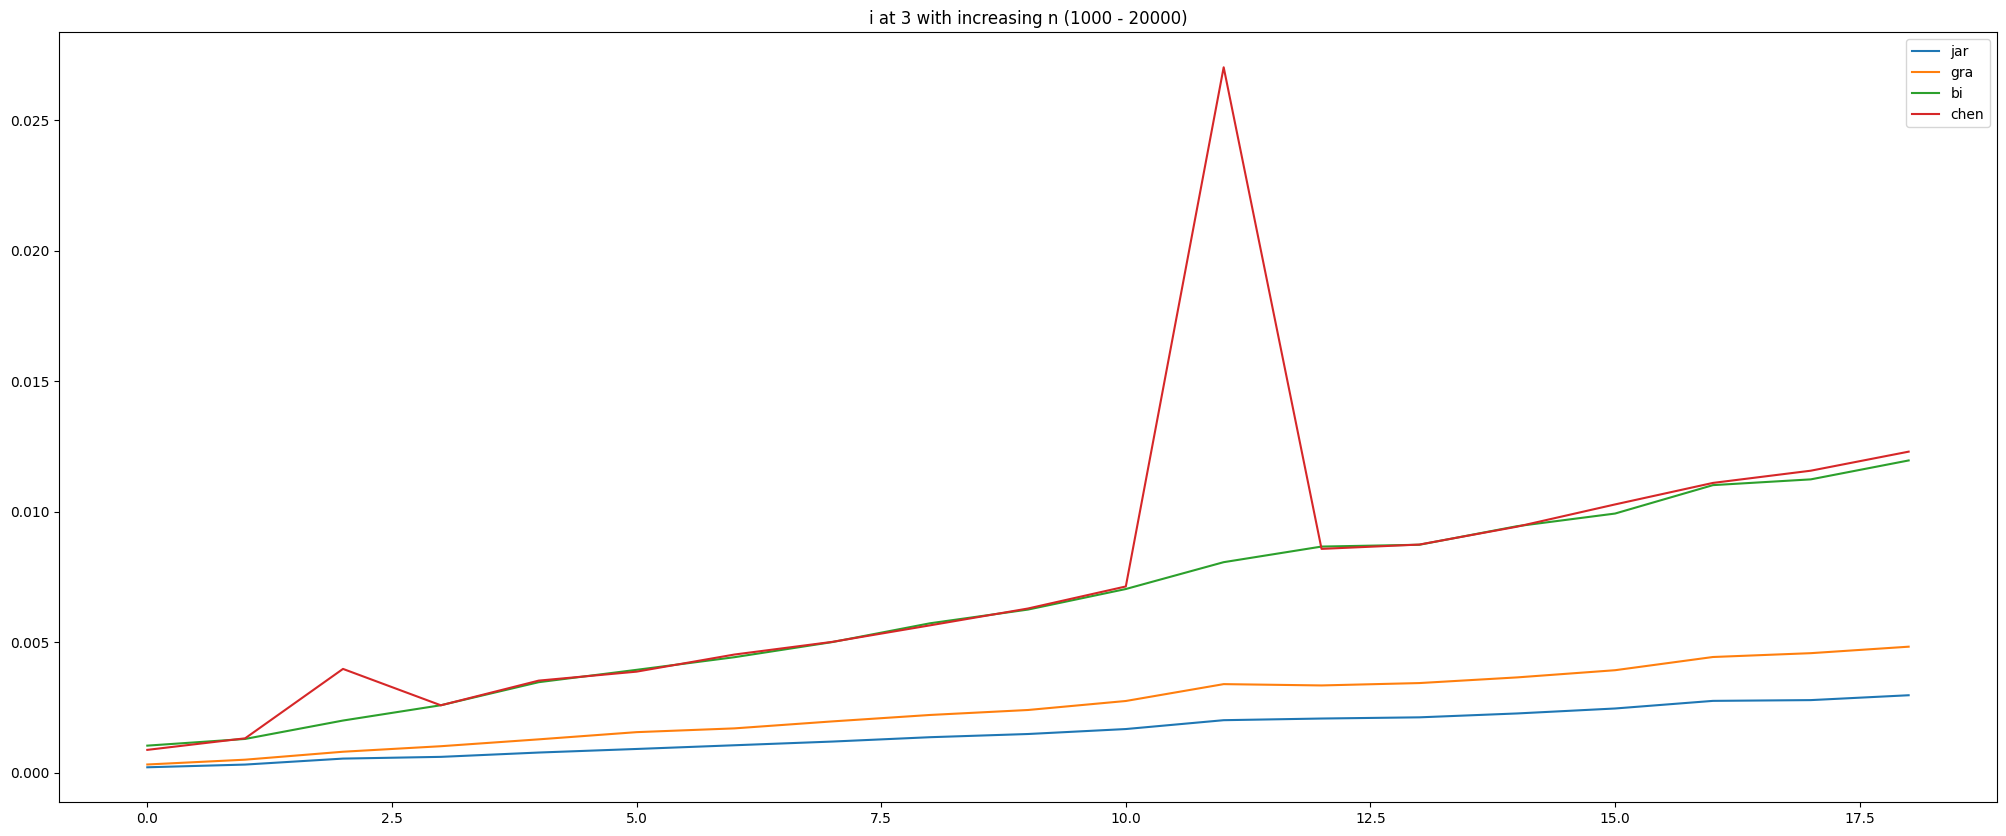

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(jar0, label = 'jar', marker = '')
plt.plot(gra0, label = 'gra', marker = '')
plt.plot(bi0, label = 'bi', marker = '')
plt.plot(chen0, label = 'chen', marker = '')
plt.title("i at 3 with increasing n (1000 - 20000)")
plt.legend()

In [ ]:
# gra0 = []
# chen0 = []
jar1 = []
# bi0 = []
X_1 = []

for h in range(5,35,7):
    print(h)
    X_1.append(h)
    n = 35
    points = TestDataGenerator(n, h).points
    j_t, g_t, b_t, l_t = 0, 0, 0, 0
    for i in range(3):
        start = ti.default_timer()
        jarvis(points, n+1)
        j_t += ti.default_timer() - start 
        
        # start = ti.default_timer()
        # graham_scan(points)
        # g_t += ti.default_timer() - start
        
        # start = ti.default_timer()
        # chen(points)
        # b_t += ti.default_timer() - start
        
        # start = ti.default_timer()
        # chen1(points)
        # l_t += ti.default_timer() - start
    
    jar1.append(j_t / 3)                                                              
    # gra0.append(g_t / 10)
    # bi0.append(b_t / 10)
    # chen0.append(l_t/ 10)

5
12
19
26
33


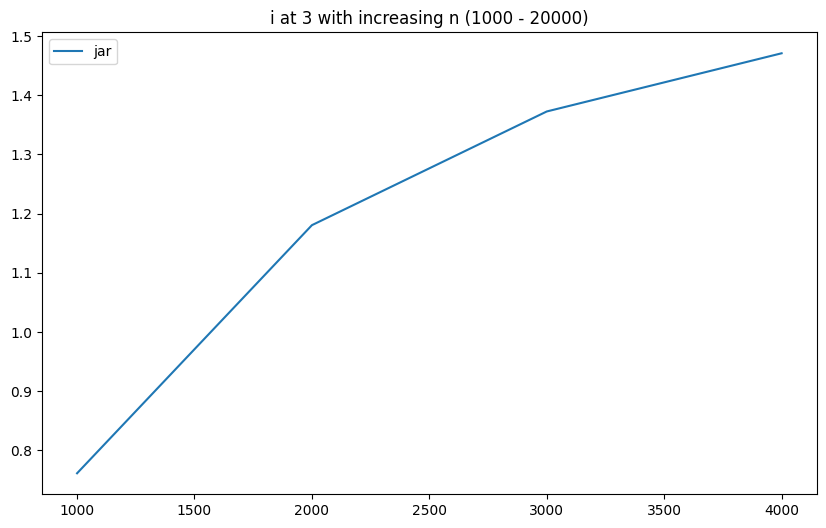

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(X_0, jar0, label = 'jar', marker = '')
# plt.plot(gra0, label = 'gra', marker = '')
# plt.plot(bi0, label = 'bi', marker = '')
# plt.plot(chen0, label = 'chen', marker = '')
plt.title("i at 3 with increasing n (1000 - 20000)")
plt.legend()

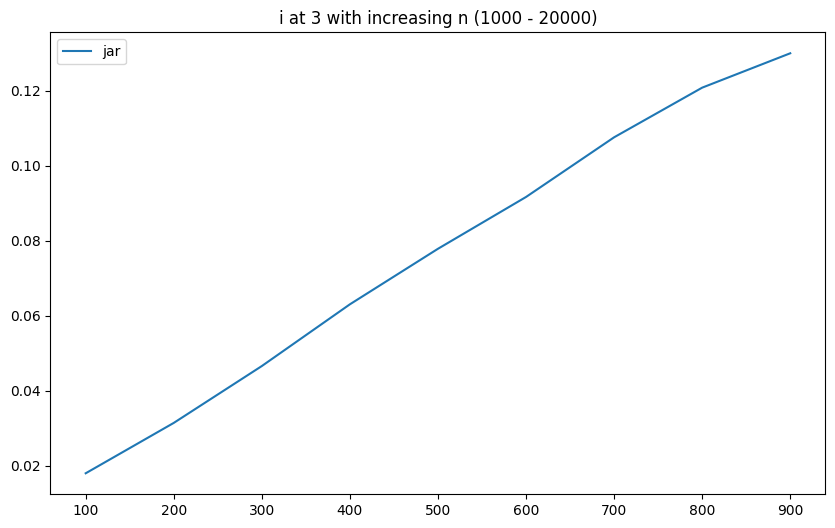

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(X_1, jar1, label = 'jar', marker = '')
# plt.plot(gra0, label = 'gra', marker = '')
# plt.plot(bi0, label = 'bi', marker = '')
# plt.plot(chen0, label = 'chen', marker = '')
plt.title("i at 3 with increasing n (1000 - 20000)")
plt.legend()

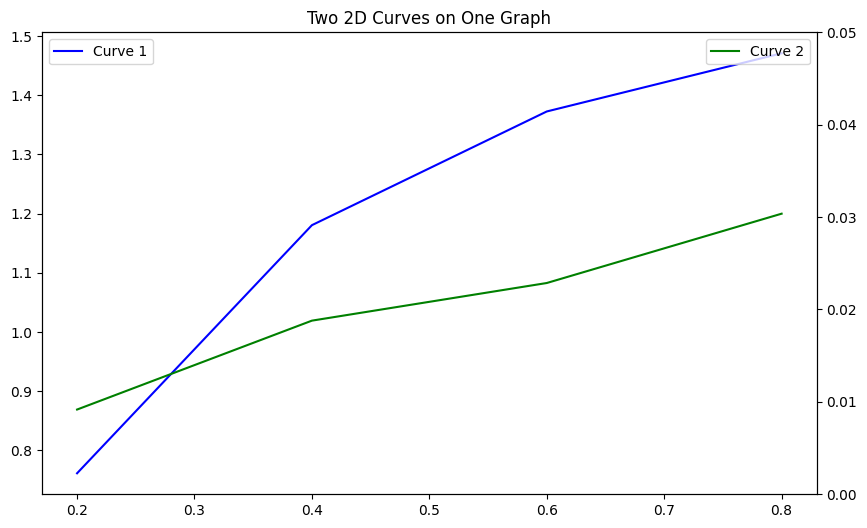

In [ ]:
r = [0.1*x for x in range(2,10,2)]
fig, ax1 = plt.subplots(figsize = (10,6))
# Create a figure and axes
# Plot the first curve with a solid line and label
ax1.plot(r,jar0, label='Curve 1', color='blue')
ax1.set_label('h = 500')
ax1.legend(loc = 'upper left')

ax2 = ax1.twinx()
# Plot the second curve with a dashed line and label
ax2.plot(r,jar1, label='Curve 2', color='green')
ax2.set_label('h = 5000')
ax2.set_ylim(0,0.05)

# Add labels and title
plt.title('Two 2D Curves on One Graph')

# Add a legend
plt.legend()

# Show plot
plt.show()
